In [2]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of classes : ', nClasses)
print('Class labels : ', classes)

Total number of classes :  10
Class labels :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

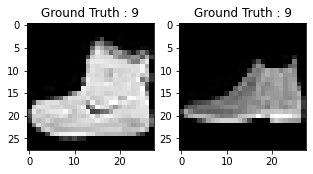

In [4]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
# Experimenting: Remove most of the data
n = 2000
train_X = train_X[:n,:]
test_X = test_X[:n,:]
train_Y = train_Y[:n]
test_Y = test_Y[:n]

# Give the data a single layer
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape
#print(train_X[0].reshape(28,28))

((2000, 28, 28, 1), (2000, 28, 28, 1))

In [6]:
# Convert the data to 32bit float type...
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# ...and normalize the data
train_X = train_X / 255.
test_X = test_X / 255

#print(np.shape(train_X))
#plt.imshow(train_X[0].reshape(28,28))

In [7]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

print(np.shape(train_X))
print(np.shape(train_Y_one_hot))

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(2000, 28, 28, 1)
(2000, 10)


In [8]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU

In [10]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(28, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.compile(
    loss=keras.losses.categorical_crossentropy, 
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2720      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

2021-12-03 14:35:02.204799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 14:35:02.205206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-03 14:35:02.205273: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-12-03 14:35:02.205348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-12-03 14:35:02.205409: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [11]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
25/25 [==============================] - 2s 49ms/step - loss: 1.4557 - accuracy: 0.4775 - val_loss: 1.0160 - val_accuracy: 0.6075
Epoch 2/20
25/25 [==============================] - 1s 46ms/step - loss: 0.8182 - accuracy: 0.7013 - val_loss: 0.7274 - val_accuracy: 0.7475
Epoch 3/20
25/25 [==============================] - 1s 46ms/step - loss: 0.6897 - accuracy: 0.7475 - val_loss: 0.5963 - val_accuracy: 0.7775
Epoch 4/20
25/25 [==============================] - 1s 45ms/step - loss: 0.5734 - accuracy: 0.7925 - val_loss: 0.6186 - val_accuracy: 0.7625
Epoch 5/20
25/25 [==============================] - 1s 47ms/step - loss: 0.5449 - accuracy: 0.8025 - val_loss: 0.5200 - val_accuracy: 0.8150
Epoch 6/20
25/25 [==============================] - 1s 45ms/step - loss: 0.4952 - accuracy: 0.8175 - val_loss: 0.5305 - val_accuracy: 0.8100
Epoch 7/20
25/25 [==============================] - 1s 47ms/step - loss: 0.4381 - accuracy: 0.8438 - val_loss: 0.4540 - val_accuracy: 0.8375
Epoch 8/20
25

In [12]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.49094074964523315
Test accuracy: 0.843500018119812


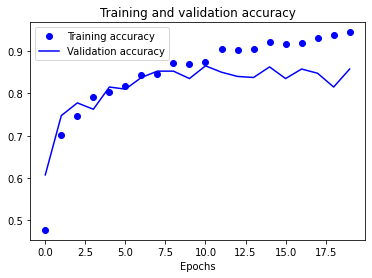

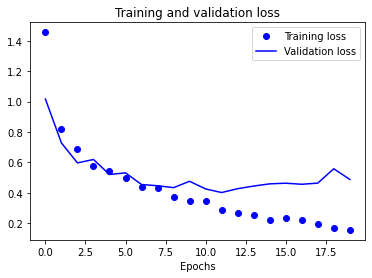

In [13]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [14]:
batch_size = 64
epochs = 20
num_classes = 10

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
25/25 [==============================] - 1s 34ms/step - loss: 1.8907 - accuracy: 0.2944 - val_loss: 1.1558 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 1s 29ms/step - loss: 1.1022 - accuracy: 0.5719 - val_loss: 0.8106 - val_accuracy: 0.7175
Epoch 3/20
25/25 [==============================] - 1s 32ms/step - loss: 0.8684 - accuracy: 0.6750 - val_loss: 0.7240 - val_accuracy: 0.7300
Epoch 4/20
25/25 [==============================] - 1s 33ms/step - loss: 0.7438 - accuracy: 0.7237 - val_loss: 0.6204 - val_accuracy: 0.7750
Epoch 5/20
25/25 [==============================] - 1s 33ms/step - loss: 0.6980 - accuracy: 0.7425 - val_loss: 0.5961 - val_accuracy: 0.7800
Epoch 6/20
25/25 [==============================] - 1s 35ms/step - loss: 0.6192 - accuracy: 0.7837 - val_loss: 0.5812 - val_accuracy: 0.8025
Epoch 7/20
25/25 [==============================] - 1s 31ms/step - loss: 0.5831 - accuracy: 0.7800 - val_loss: 0.5094 - val_accuracy: 0.8125
Epoch 8/20
25

2021-12-03 14:35:44.794583: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets
63/63 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.8450
Test loss: 0.44271039962768555
Test accuracy: 0.8450000286102295


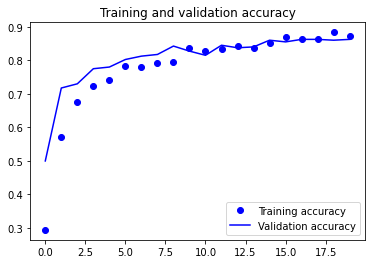

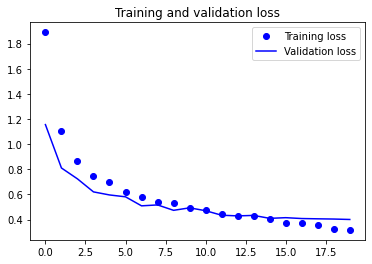

In [16]:
fashion_model.save("fashion_model_dropout.h5py")

test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

(2000,) (2000,)
Found 1646 correct labels


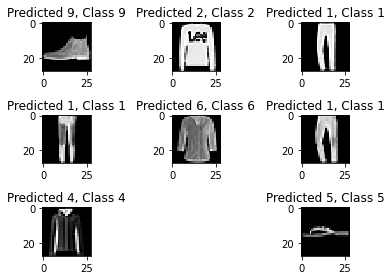

In [17]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

print(predicted_classes.shape, test_Y.shape)

correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 354 incorrect labels


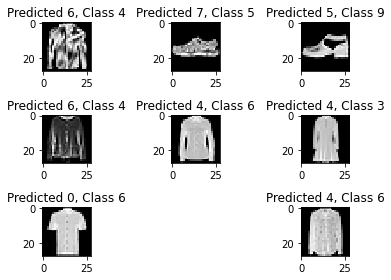

In [18]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [19]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.53      0.90      0.66       200
     Class 1       0.98      0.97      0.98       203
     Class 2       0.90      0.59      0.72       214
     Class 3       0.90      0.83      0.87       190
     Class 4       0.67      0.82      0.74       219
     Class 5       0.98      0.89      0.94       195
     Class 6       0.70      0.38      0.49       197
     Class 7       0.87      0.99      0.93       200
     Class 8       0.97      0.94      0.96       194
     Class 9       0.99      0.93      0.96       188

    accuracy                           0.82      2000
   macro avg       0.85      0.82      0.82      2000
weighted avg       0.85      0.82      0.82      2000

